# Auswertung Versuch 211

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
from tabulate import tabulate

---

# Vergleich der Schwebungsfrequenzen

In [2]:
#Arrays mit gemessenen Freq.:
symm = np.array([3.876, 3.878, 3.877])
dsymm = np.array([0.054, 0.054, 0.053])

asymm = np.array([3.978, 4.168, 4.626])
dasymm = np.array([0.056, 0.055, 0.057])

beat1 = np.array([3.869, 3.871, 3.873])
dbeat1 = np.array([0.019, 0.028, 0.028])

beat2 = np.array([3.973, 4.163, 4.622])
dbeat2 = np.array([0.019, 0.03, 0.033])

### Berechnung der Frequenzen

In [3]:
omegaI_AS = 1/2 * (asymm + symm)
domegaI_AS = 1/2 * np.sqrt(dasymm**2 + dsymm**2)
print(omegaI_AS, domegaI_AS)

omegaII_AS = 1/2 * (asymm - symm)
domegaII_AS = 1/2 * np.sqrt(dasymm**2 + dsymm**2)
print(omegaII_AS, domegaII_AS)

omegaI_B = 1/2 * (beat2 + beat1)
domegaI_B = 1/2 * np.sqrt(dbeat1**2 + dbeat2**2)
print(omegaI_B, domegaI_B)

omegaII_B = 1/2 * (beat2 - beat1)
domegaII_B = 1/2 * np.sqrt(dbeat1**2 + dbeat2**2)
print(omegaII_B, domegaII_B)

#Signifikanztests:
Sign_AS_B_I = []
for i in range(0, len(omegaI_AS)):
    a  = abs(omegaI_AS[i] - omegaI_B[i]) / (np.sqrt(domegaI_AS[i]**2 + domegaI_B[i]**2))
    Sign_AS_B_I.append(a)
print(Sign_AS_B_I)

Sign_AS_B_II = []
for i in range(0, len(omegaII_AS)):
    a  = abs(omegaII_AS[i] - omegaII_B[i]) / (np.sqrt(domegaII_AS[i]**2 + domegaII_B[i]**2))
    Sign_AS_B_II.append(a)
print(Sign_AS_B_II)

[3.927  4.023  4.2515] [0.0388973  0.03853894 0.03891658]
[0.051  0.145  0.3745] [0.0388973  0.03853894 0.03891658]
[3.921  4.017  4.2475] [0.01343503 0.02051828 0.02163909]
[0.052  0.146  0.3745] [0.01343503 0.02051828 0.02163909]
[0.14580037798796466, 0.13742360023531322, 0.08983095403371955]
[0.024300062997986913, 0.022903933372557292, 9.973239349229049e-15]


---

### Auslesung der Periodendauern 

In [4]:
time1w, amp1w, time2w, amp2w = np.loadtxt('./data/beat - weak coupling.txt', 
                                          delimiter = ",", 
                                          unpack=True)

time1m, amp1m, time2m, amp2m = np.loadtxt('./data/beat - middle coupling.txt', 
                                          delimiter = ",", 
                                          unpack=True)

time1s, amp1s, time2s, amp2s = np.loadtxt('./data/beat - strong coupling.txt', 
                                          delimiter = ",", 
                                          unpack=True)

(0, 185)

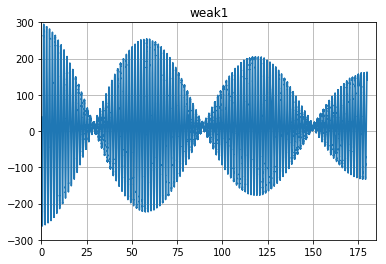

In [5]:
#%matplotlib ipympl
plt.plot(time1w, amp1w)
plt.title('weak1')
plt.grid()
plt.ylim((-300,300))
plt.xlim((0,185))

(0, 185)

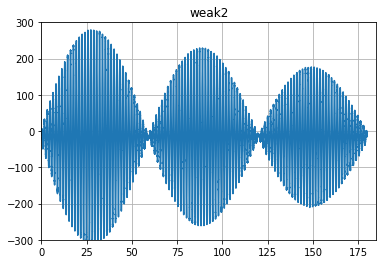

In [6]:
plt.plot(time2w, amp2w)
plt.title('weak2')
plt.grid()
plt.ylim((-300,300))
plt.xlim((0,185))

(0, 125)

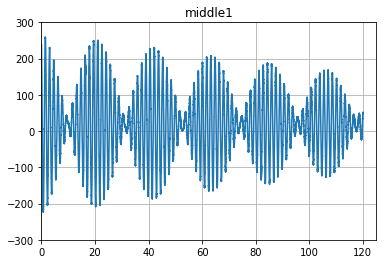

In [7]:
plt.plot(time1m, amp1m)
plt.title('middle1')
plt.grid()
plt.ylim((-300,300))
plt.xlim((0,125))

(0, 125)

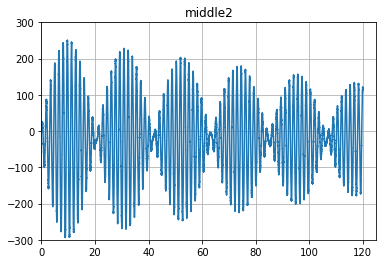

In [8]:
plt.plot(time2m, amp2m)
plt.title('middle2')
plt.grid()
plt.ylim((-300,300))
plt.xlim((0,125))

(0, 125)

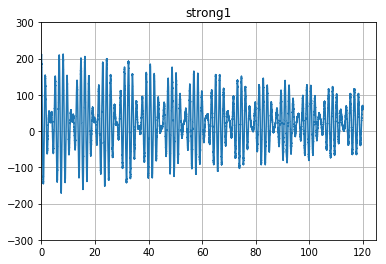

In [9]:
plt.plot(time1s, amp1s)
plt.title('strong1')
plt.grid()
plt.ylim((-300,300))
plt.xlim((0,125))

(0, 125)

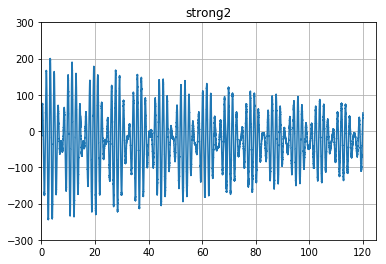

In [10]:
plt.plot(time2s, amp2s)
plt.title('strong2')
plt.grid()
plt.ylim((-300,300))
plt.xlim((0,125))

---

In [11]:
ti = np.array([28.908, 53.7586, 31.2505, 38.5897, 19.64, 21.792])
tf = np.array([150.7, 55.3664, 74.1725, 40.1576, 36.6155, 23.2754])

#Berechnung Periodendauer:
T = tf - ti
dT = np.array([np.sqrt(2), np.sqrt(2 * 0.01**2), np.sqrt(2), np.sqrt(2 * 0.01**2), np.sqrt(2), np.sqrt(2 * 0.01**2)])
print(T)
print(dT)

[121.792    1.6078  42.922    1.5679  16.9755   1.4834]
[1.41421356 0.01414214 1.41421356 0.01414214 1.41421356 0.01414214]


In [12]:
#Aufspaltung in Werte für omega1 und omega2
T1 = np.array([T[0], T[2], T[4]])
dT1 = np.array([dT[0], dT[2], dT[4]])
T2 = np.array([T[1], T[3], T[5]])
dT2 = np.array([dT[1], dT[3], dT[5]])

In [13]:
omegaII_T = 2 * np.pi /T1
domegaII_T = 2 * np.pi /(T1**2) * dT1
omegaI_T = 2 * np.pi /T2
domegaI_T = 2 * np.pi /(T2**2) * dT2
print(omegaI_T)
print(domegaI_T)
print(omegaII_T)
print(domegaII_T)

[3.90793961 4.00738906 4.2356649 ]
[0.03437406 0.03614583 0.04038112]
[0.05158947 0.14638613 0.37013256]
[0.00059904 0.0048232  0.03083541]


In [14]:
Sign_T_B_I = []
for i in range(0, len(omegaI_T)):
    a  = abs(omegaI_T[i] - omegaI_B[i]) / (np.sqrt(domegaI_T[i]**2 + domegaI_B[i]**2))
    Sign_T_B_I.append(a)
print(Sign_T_B_I)

Sign_T_B_II = []
for i in range(0, len(omegaII_T)):
    a  = abs(omegaII_T[i] - omegaII_B[i]) / (np.sqrt(domegaII_T[i]**2 + domegaII_B[i]**2))
    Sign_T_B_II.append(a)
print(Sign_T_B_II)

[0.3538795291211578, 0.2312353550977651, 0.25833175506387257]
[0.030526007294500855, 0.01831930726228793, 0.1159376402882706]


---

# Berechnung der Kopplungsgrade

In [15]:
k_as = (asymm**2 - symm**2)/(asymm**2+symm**2)
dk_as = np.sqrt((4 * symm**2 * asymm * dasymm /(asymm**2 + symm**2)**2)**2 + 
               (4 * asymm**2 * symm * dsymm /(asymm**2 + symm**2)**2)**2)

k_b = (beat2**2 - beat1**2)/(beat2**2+beat1**2)
dk_b = np.sqrt((4 * beat1**2 * beat2 * dbeat2 /(beat2**2 + beat1**2)**2)**2 + 
               (4 * beat2**2 * beat1 * dbeat1 /(beat2**2 + beat1**2)**2)**2)

print(k_as, dk_as)
print(k_b, dk_b)

[0.02596965 0.07199198 0.17481667] [0.01979249 0.01908457 0.01784142]
[0.02651918 0.07259516 0.17497876] [0.00684985 0.01015656 0.00984973]


In [16]:
#Mittelwert
k_mean = 0.5 * (k_as + k_b)
dk_mean = 0.5 * np.sqrt(dk_as**2 + dk_b**2)

print(k_mean, dk_mean)

[0.02624441 0.07229357 0.17489772] [0.01047214 0.01080945 0.01018987]


---

### Verhältnisse und Vergleich

In [17]:
#Verhältnisse der Kopplungsgrade:
div_k = np.array([k_mean[0]/k_mean[1], k_mean[0]/k_mean[2], k_mean[1]/k_mean[2]])
def errdivk(k1, k2, dk1, dk2):
    return k1/k2 * np.sqrt((dk1/k1)**2 + (dk2/k2)**2)
ddiv_k = np.array([errdivk(k_mean[0], k_mean[1], dk_mean[0], dk_mean[1]), 
                  errdivk(k_mean[0], k_mean[2], dk_mean[0], dk_mean[2]), 
                  errdivk(k_mean[1], k_mean[2], dk_mean[1], dk_mean[2])])

#Verhältnisse der Längen:
l = np.array([15.45, 25.45, 40.50])
dl= np.array([0.05, 0.05, 0.05])

div_l = np.array([l[0]**2/l[1]**2, l[0]**2/l[2]**2, l[1]**2/l[2]**2])
def errdivl(l1, l2, dl1, dl2):
    return l1**2/l2**2 * np.sqrt((2 * dl1/l1)**2 + (2 * dl2/l2)**2)
ddiv_l = np.array([errdivl(l[0], l[1], dl[0], dl[1]), 
                  errdivl(l[0], l[2], dl[0], dl[2]), 
                  errdivl(l[1], l[2], dl[1], dl[2])])

print(div_k, ddiv_k)
print(div_l, ddiv_l)

[0.36302554 0.15005578 0.41334774] [0.1546917  0.06051069 0.06633058]
[0.36853725 0.14552812 0.39488035] [0.00279049 0.00100814 0.00183251]


In [18]:
#Signifikantzest:
Sign_div = []
for i in range(0, len(div_k)):
    a  = abs(div_k[i] - div_l[i]) / (np.sqrt(ddiv_k[i]**2 + ddiv_l[i]**2))
    Sign_div.append(a)
print(Sign_div)

[0.03562453328160898, 0.07481380208048984, 0.27830811046864223]
